Candidate: Shalaka Saraogi 

Test for Data Analyst role at Poppulo

Task: Business Customer Segmentation and Analysis

In [286]:
# import required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [287]:
# loading the dataset
df = pd.read_excel("C:\\Users\\shalaka.saraogi\\Downloads\\Software_Company_Dataset.xlsx")
df.head()

,Account Name,ARR,Employee Band,Industry,Region,Product Usage Level,Segmentation
0,Spottyfi,300000,501-1000,Finance,Africa,Moderate,Workplace
1,Spottyfi,250000,5001-10000,Finance,Africa,Heavy,Feeds
2,Microhard,200000,5001-10000,Healthcare,Europe,Moderate,Enterprise
3,Facebrooke,50000,0-500,Retail,Australia,Heavy,Enterprise
4,Pomme,250000,0-500,Retail,Europe,Light,Feeds


Data Exploration and Data Pre-processing:

In [288]:
# checking the shape of the dataset
print("\nShape of the dataset: ")
df.shape


Shape of the dataset: 


(500, 7)

In [289]:
# checking the info of the dataset
print("\nDiscription of the dataset: \n ")
df.info()


Discription of the dataset: 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Account Name         500 non-null    object
 1   ARR                  500 non-null    int64 
 2   Employee Band        500 non-null    object
 3   Industry             500 non-null    object
 4   Region               500 non-null    object
 5   Product Usage Level  500 non-null    object
 6   Segmentation         500 non-null    object
dtypes: int64(1), object(6)
memory usage: 27.5+ KB


In [290]:
# checking the null or missing values
df.isnull().sum()

Account Name           0
ARR                    0
Employee Band          0
Industry               0
Region                 0
Product Usage Level    0
Segmentation           0
dtype: int64

In [291]:
# checking the duplicate record
df.duplicated().sum()

1

In [292]:
# display the duplicate record
df[df.duplicated()]

,Account Name,ARR,Employee Band,Industry,Region,Product Usage Level,Segmentation
153,Microhard,50000,1001-5000,Education,North America,Moderate,Workplace


In [293]:
# drop the duplicate records
df.drop_duplicates(inplace=True)

In [294]:
df['Account Name'].value_counts()   

Giggle        85
Amazoon       80
Microhard     78
Facebrooke    67
Spottyfi      65
Netflax       63
Pomme         61
Name: Account Name, dtype: int64

In [295]:
# Mapping of corrections
corrections = {
    'Giggle': 'Google',
    'Amazoon': 'Amazon',
    'Microhard': 'Microsoft',
    'Facebrooke': 'Facebook',
    'Spottyfi': 'Spotify',
    'Netflax': 'Netflix',
    'Pomme': 'Apple'
}

# Replace names in the "account name" column
df['Account Name'] = df['Account Name'].replace(corrections)
df['Account Name'].value_counts() 

Google       85
Amazon       80
Microsoft    78
Facebook     67
Spotify      65
Netflix      63
Apple        61
Name: Account Name, dtype: int64

In [296]:
# summary statistics for the dataset
print("\nSummary statistics for the dataset: \n ")
print("For the numerical columns in the dataset: \n ")
df.describe() # for all the numerical columns in the dataset
print("\nFor the categorical columns in the dataset: \n ")
df.select_dtypes(include="object").describe() # for all the categorical columns in the dataset


Summary statistics for the dataset: 
 
For the numerical columns in the dataset: 
 


,ARR
count,499.000000
mean,171142.284569
std,89321.391837
min,25000.000000
25%,100000.000000
50%,175000.000000
75%,250000.000000
max,300000.000000



For the categorical columns in the dataset: 
 


,Account Name,Employee Band,Industry,Region,Product Usage Level,Segmentation
count,499,499,499,499,499,499
unique,7,4,6,6,3,4
top,Google,1001-5000,Finance,Asia,Heavy,Workplace
freq,85,139,94,97,182,133


In [297]:
# count_values() for all the categorical columns in the dataset
print("\nCount of values for all the categorical columns in the dataset: \n ")
for i in df.select_dtypes(include="object").columns:
    print("====================================")
    print("Column name: ",i)
    print("====================================\n")
    print(df[i].value_counts().to_frame())
    print("\n")
# display in dataframe


Count of values for all the categorical columns in the dataset: 
 
Column name:  Account Name

           Account Name
Google               85
Amazon               80
Microsoft            78
Facebook             67
Spotify              65
Netflix              63
Apple                61


Column name:  Employee Band

            Employee Band
1001-5000             139
0-500                 135
501-1000              114
5001-10000            111


Column name:  Industry

               Industry
Finance              94
Education            86
Retail               83
Healthcare           80
Technology           80
Manufacturing        76


Column name:  Region

               Region
Asia               97
Australia          86
North America      85
Europe             82
Africa             75
South America      74


Column name:  Product Usage Level

          Product Usage Level
Heavy                     182
Moderate                  161
Light                     156


Column name:  Segmen

Outlier Detection:

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='ARR'>

Text(0.5, 1.0, 'Outliers in ARR Distribution')

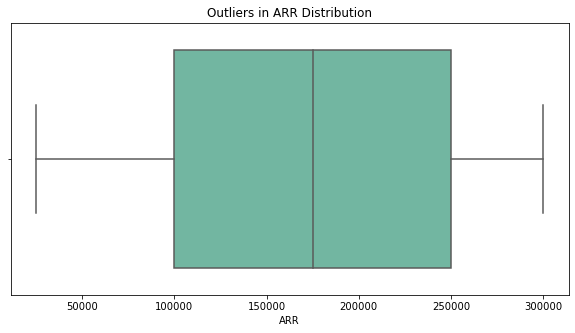

In [298]:
# Outlier in ARR
sns.set_palette('Set2')
plt.figure(figsize=(10,5))
sns.boxplot(x='ARR', data=df)
plt.title('Outliers in ARR Distribution')
plt.show()

In [299]:
# Overall Performance
# What is the total ARR for all accounts?
total_arr = df['ARR'].sum()
average_arr_per_account = df['ARR'].mean()

# ARR by Account Name
arr_by_account_name = df.groupby('Account Name')['ARR'].sum().sort_values(ascending=False)

# How is ARR distributed among different employee bands?
arr_by_employee_band = df.groupby('Employee Band')['ARR'].sum().sort_values(ascending=False)

# How is ARR distributed across different industries?Industry Specifics
arr_by_industry = df.groupby('Industry')['ARR'].sum().sort_values(ascending=False)

# How is ARR distributed across different regions?
arr_by_region = df.groupby('Region')['ARR'].sum().sort_values(ascending=False)

# How does ARR correlate with the level of product usage?
arr_by_product_usage = df.groupby('Product Usage Level')['ARR'].sum().sort_values(ascending=False)

# How is ARR segmented based on the specified criteria?
arr_by_segmentation = df.groupby('Segmentation')['ARR'].sum().sort_values(ascending=False)

# Displaying results
print("Total ARR:", total_arr)
print("Average ARR per account:", average_arr_per_account)
print("\nARR by Account Name:\n", arr_by_account_name)
print("\nARR by Employee Band:\n", arr_by_employee_band)
print("\nARR by Industry:\n", arr_by_industry)
print("\nARR by Region:\n", arr_by_region)
print("\nARR by Product Usage Level:\n", arr_by_product_usage)
print("\nARR by Segmentation:\n", arr_by_segmentation)

Total ARR: 85400000
Average ARR per account: 171142.28456913828

ARR by Account Name:
 Account Name
Google       14875000
Amazon       14725000
Microsoft    12975000
Spotify      12575000
Facebook     11200000
Apple         9875000
Netflix       9175000
Name: ARR, dtype: int64

ARR by Employee Band:
 Employee Band
1001-5000     23725000
0-500         22425000
5001-10000    19700000
501-1000      19550000
Name: ARR, dtype: int64

ARR by Industry:
 Industry
Retail           15475000
Finance          15325000
Education        15175000
Manufacturing    13825000
Technology       13000000
Healthcare       12600000
Name: ARR, dtype: int64

ARR by Region:
 Region
Asia             18200000
Australia        15525000
Europe           13925000
North America    13825000
Africa           12000000
South America    11925000
Name: ARR, dtype: int64

ARR by Product Usage Level:
 Product Usage Level
Heavy       30200000
Moderate    27975000
Light       27225000
Name: ARR, dtype: int64

ARR by Segmentatio

<Figure size 1000x500 with 0 Axes>

<AxesSubplot:xlabel='ARR', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of ARR')

Text(0.5, 0, 'ARR (Annual Recurring Revenue) in $')

Text(0, 0.5, 'Count')

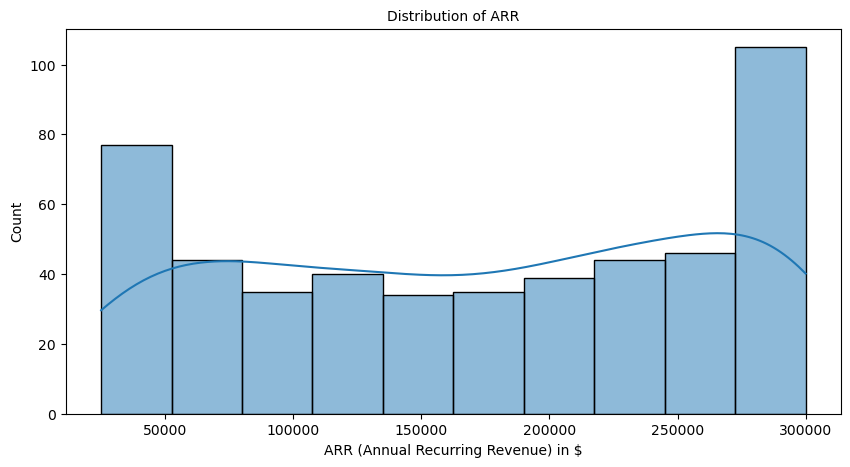

In [300]:
# Univariate Analysis:
# checking the distribution of ARR
plt.style.use('default')
plt.figure(figsize=(10, 5))
sns.histplot(df["ARR"], bins=10, kde=True)
plt.title("Distribution of ARR", fontsize=10)
plt.xlabel("ARR (Annual Recurring Revenue) in $")
plt.ylabel("Count")
plt.show()

The histogram visualization indicates that the ARR values are evenly distributed across the spectrum from 25,000 to 300,000, with a slight increase in frequency towards the lower and higher end of the scale.

<Figure size 2500x1000 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='Account Name', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='Industry', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='Employee Band', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='Region', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='Product Usage Level', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='Segmentation', ylabel='count'>

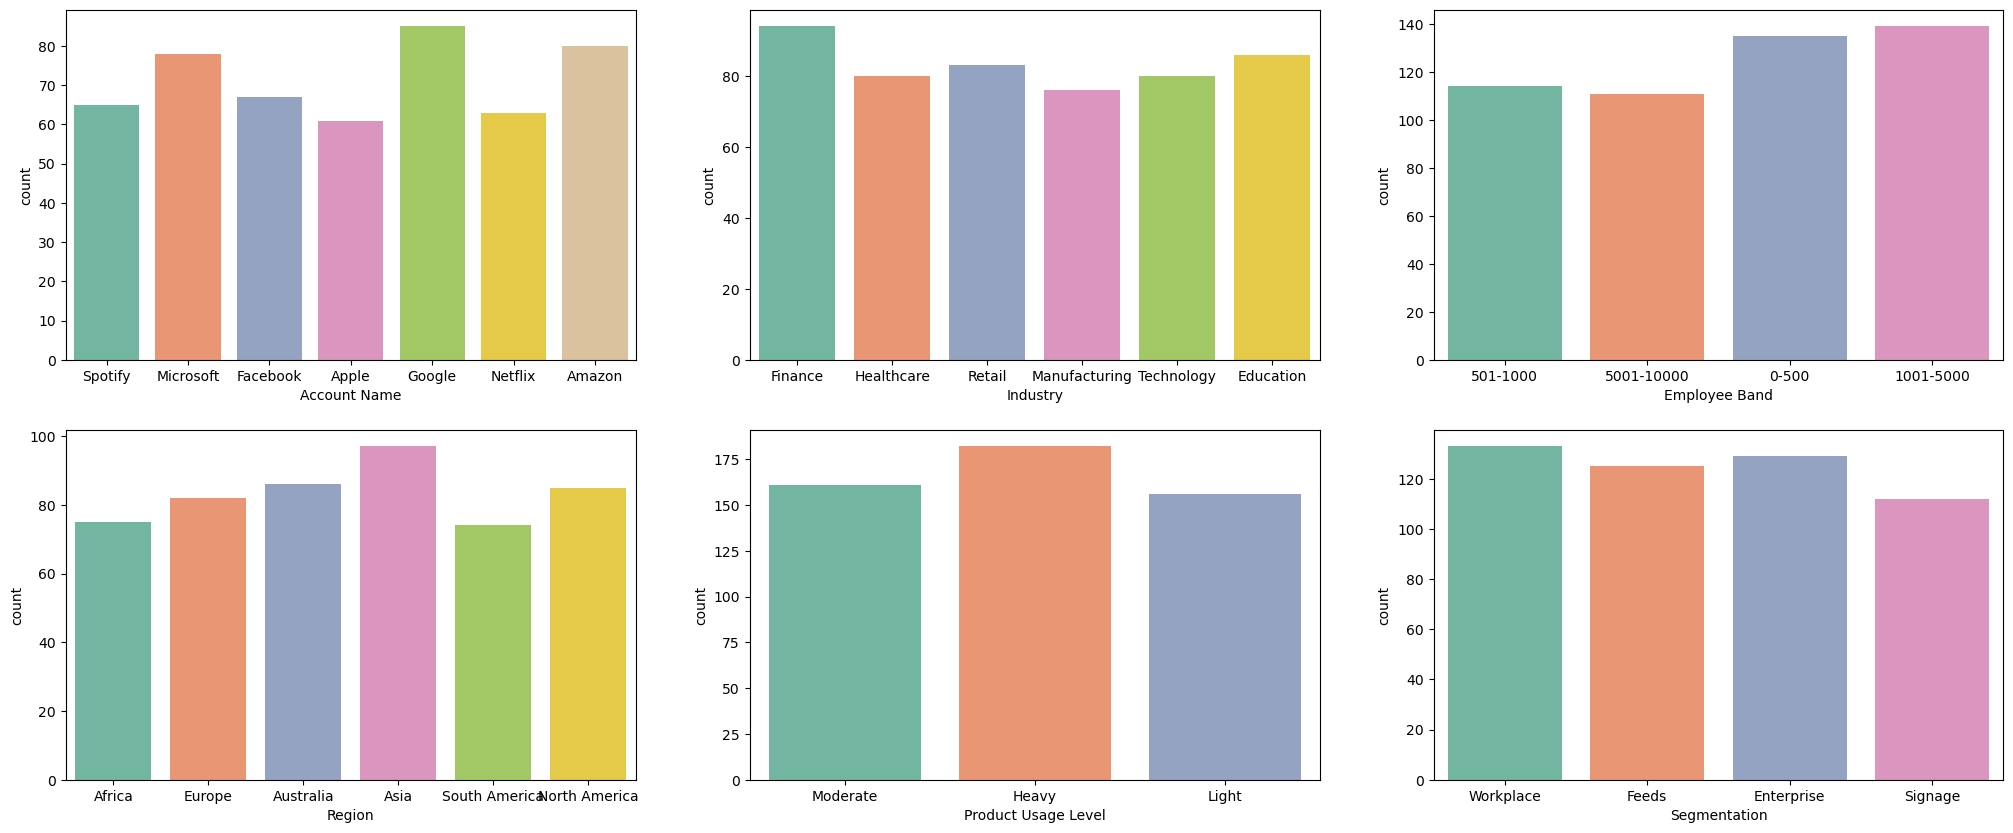

In [301]:
# Distribution of Acount Name, Industry, Employee band, Region, Product Usage level, Segmentation
sns.set_palette('Set2')
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.countplot(df["Account Name"])
plt.subplot(2,3,2)
sns.countplot(df["Industry"])
plt.subplot(2,3,3)
sns.countplot(df["Employee Band"])
plt.subplot(2,3,4)
sns.countplot(df["Region"])
plt.subplot(2,3,5)
sns.countplot(df["Product Usage Level"])
plt.subplot(2,3,6)
sns.countplot(df["Segmentation"])
plt.show()

In [302]:
# Bivariate Analysis:
# Relationship between ARR and Region
fig = px.box(df, x='Region', y='ARR', color_discrete_sequence=px.colors.qualitative.Set2, title='Distribution of ARR across Region')
fig.show()
# Relationship between ARR and Industry
fig = px.box(df, x='Industry', y='ARR', title='Distribution of ARR across Industries')
fig.show()
# Relationship between ARR and  Industries in different regions
fig = px.box(df, x='Industry', y='ARR', color='Region', title=' Distribution of ARR across Industries in different regions')
fig.show()
# Relationship between ARR and Segmentation
fig = px.box(df, x='Segmentation', y='ARR', color_discrete_sequence=px.colors.qualitative.Set2, title='Distribution of ARR across Segmentation')
fig.show()
# Relationship between ARR and Employee Band
fig = px.box(df, x='Employee Band', y='ARR',  title='Distribution of ARR across Employee Band')
fig.show()
# ARR across Product Usage Level
fig = px.box(df, x='Product Usage Level', y='ARR', color_discrete_sequence=px.colors.qualitative.Set2, title='Distribution of ARR across Product Usage Level')
fig.show()

Univariate Analysis:
What is the distribution of ARR (Annual Recurring Revenue)?
How many unique Account Names are in the dataset? And what are the top 3 Account Names?
What is the distribution of Employee Bands?
What industries are most represented in the dataset?
What is the distribution of regions in the dataset?
How is the Product Usage Level distributed?
What is the distribution of Segmentation?

<Figure size 1500x500 with 0 Axes>

<AxesSubplot:xlabel='Account Name', ylabel='ARR'>

Text(0.5, 1.0, 'ARR for various Account Name ')

Text(0.5, 0, 'Account Name')

Text(0, 0.5, 'ARR (Annual Recurring Revenue) in $')

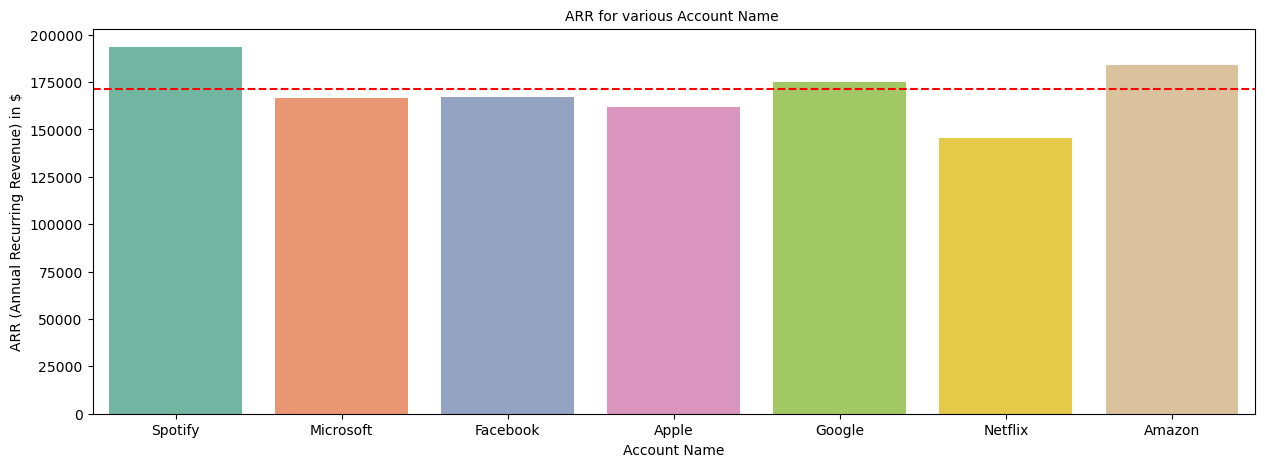

In [303]:
# Bivariate Analysis:
# Relationship between ARR and Account Name
plt.figure(figsize=(15, 5))
sns.set_palette('Set2')
sns.barplot(x='Account Name', y='ARR', data=df, ci=None)
plt.title("ARR for various Account Name ", fontsize=10)
plt.xlabel("Account Name")
plt.ylabel("ARR (Annual Recurring Revenue) in $")
# add average line
plt.axhline(df['ARR'].mean(), color='r', linestyle='--')
plt.show()

([<matplotlib.patches.Wedge at 0x22ffb0974f0>,
 [Text(-0.7683625023407469, 0.7871588562651542, 'Africa'),
  Text(-0.8740354423940179, -0.667878765524922, 'Europe'),
  Text(0.3145402773636119, -1.0540704027321999, 'South America'),
  Text(1.0740852009010422, -0.23736255223890712, 'North America'),
  Text(0.8740353954955237, 0.6678788268997481, 'Australia'),
  Text(0.3145401540021177, 1.0540704395439255, 'Asia')],
 [Text(-0.41910681945858913, 0.42935937614462955, '24.6%'),
  Text(-0.47674660494219145, -0.3642975084681392, '21.5%'),
  Text(0.17156742401651556, -0.5749474923993817, '16.9%'),
  Text(0.5858646550369321, -0.12947048303940387, '16.9%'),
  Text(0.4767465793611947, 0.3642975419453171, '10.8%'),
  Text(0.17156735672842782, 0.5749475124785047, '9.2%')])

Text(0.5, 1.0, 'Spotify - Region Proportion')

([<matplotlib.patches.Wedge at 0x22f82d6ed00>,
 [Text(-0.6608164980507395, 0.8793870341914061, 'Australia'),
  Text(-1.0565699136107083, -0.30603924201425664, 'Europe'),
  Text(-0.17645234768943208, -1.0857552988564634, 'North America'),
  Text(0.8520655189702744, -0.6956898384926411, 'Asia'),
  Text(1.056569884957242, 0.30603934093746926, 'South America'),
  Text(0.43116310442943506, 1.0119774589281978, 'Africa')],
 [Text(-0.3604453625731306, 0.4796656550134942, '20.5%'),
  Text(-0.5763108619694772, -0.16693049564413995, '17.9%'),
  Text(-0.09624673510332657, -0.5922301630126163, '17.9%'),
  Text(0.46476301034742235, -0.37946718463234963, '15.4%'),
  Text(0.5763108463403137, 0.16693054960225592, '15.4%'),
  Text(0.2351798751433282, 0.551987704869926, '12.8%')])

Text(0.5, 1.0, 'Microsoft - Region Proportion')

([<matplotlib.patches.Wedge at 0x22f837b1a60>,
 [Text(-0.7499885896495116, 0.8046844818905958, 'Australia'),
  Text(-0.8868772291011697, -0.6507294218811929, 'South America'),
  Text(0.40301805700290577, -1.023511820024372, 'Asia'),
  Text(1.0924508954181453, -0.12865084958947146, 'North America'),
  Text(0.7868816589533186, 0.7686463782539232, 'Africa'),
  Text(0.20510602970566633, 1.0807088028596687, 'Europe')],
 [Text(-0.40908468526337, 0.4389188083039613, '23.9%'),
  Text(-0.4837512158733652, -0.3549433210261052, '22.4%'),
  Text(0.21982803109249402, -0.5582791745587483, '19.4%'),
  Text(0.5958823065917155, -0.07017319068516624, '14.9%'),
  Text(0.4292081776109011, 0.41926166086577626, '13.4%'),
  Text(0.1118760162030907, 0.5894775288325466, '6.0%')])

Text(0.5, 1.0, 'Facebook - Region Proportion')

([<matplotlib.patches.Wedge at 0x22f837dc580>,
 [Text(-0.8798231813741623, 0.6602356923982889, 'Asia'),
  Text(-0.7261673187884344, -0.8262451362178277, 'Europe'),
  Text(0.3880272865150012, -1.0292885042201751, 'North America'),
  Text(1.0561648497138825, -0.3074342372424588, 'South America'),
  Text(0.9709467134682213, 0.5169743510129491, 'Africa'),
  Text(0.38802738288394467, 1.029288467890434, 'Australia')],
 [Text(-0.47990355347681574, 0.36012855948997574, '29.5%'),
  Text(-0.39609126479369144, -0.4506791652097241, '18.0%'),
  Text(0.2116512471900006, -0.5614300932110046, '16.4%'),
  Text(0.5760899180257539, -0.16769140213225023, '13.1%'),
  Text(0.5296072982553933, 0.28198600964342674, '11.5%'),
  Text(0.2116512997548789, 0.5614300733947821, '11.5%')])

Text(0.5, 1.0, 'Apple - Region Proportion')

([<matplotlib.patches.Wedge at 0x22f83804130>,
 [Text(-0.6465637858537404, 0.8899186877588754, 'South America'),
  Text(-1.0580081983716194, -0.3010293211274279, 'Africa'),
  Text(-0.16203180733972294, -1.0880007782213315, 'Asia'),
  Text(0.9017145835910918, -0.6300085790996375, 'Australia'),
  Text(1.0328871514600046, 0.37834393393952737, 'Europe'),
  Text(0.43499616118264056, 1.0103357559526271, 'North America')],
 [Text(-0.35267115592022197, 0.4854101933230229, '20.0%'),
  Text(-0.5770953809299741, -0.16419781152405158, '18.8%'),
  Text(-0.08838098582166705, -0.593454969938908, '17.6%'),
  Text(0.4918443183224136, -0.34364104314525673, '17.6%'),
  Text(0.5633929917054571, 0.20636941851246945, '12.9%'),
  Text(0.23727063337234938, 0.5510922305196148, '12.9%')])

Text(0.5, 1.0, 'Google - Region Proportion')

([<matplotlib.patches.Wedge at 0x22f83820eb0>,
 [Text(-0.7874535695704739, 0.7680604636164519, 'Asia'),
  Text(-0.8600145619153347, -0.68583886831644, 'Europe'),
  Text(0.3762222813195341, -1.0336618378554592, 'North America'),
  Text(1.091463147485665, -0.13677791371667322, 'Africa'),
  Text(0.7481898623523437, 0.8063571974461324, 'Australia'),
  Text(0.16394626668668177, 1.087713942927781, 'South America')],
 [Text(-0.4295201288566221, 0.41894207106351916, '25.4%'),
  Text(-0.46909885195381884, -0.3740939281726036, '20.6%'),
  Text(0.20521215344701857, -0.5638155479211594, '19.0%'),
  Text(0.5953435349921808, -0.07460613475454902, '15.9%'),
  Text(0.40810356128309655, 0.43983119860698133, '14.3%'),
  Text(0.08942523637455368, 0.5932985143242441, '4.8%')])

Text(0.5, 1.0, 'Netflix - Region Proportion')

([<matplotlib.patches.Wedge at 0x22f83847940>,
 [Text(-0.6810033604166862, 0.8638486112167926, 'Asia'),
  Text(-0.9989574653370706, -0.4605257674086603, 'North America'),
  Text(0.17207800309356855, -1.0864571601546607, 'Australia'),
  Text(1.0788638285357903, -0.214599253207221, 'Europe'),
  Text(0.8364464919294301, 0.7143929353926662, 'South America'),
  Text(0.2985843907727254, 1.0587007894522797, 'Africa')],
 [Text(-0.37145637840910156, 0.47119015157279587, '21.3%'),
  Text(-0.5448858901838567, -0.2511958731319965, '21.3%'),
  Text(0.0938607289601283, -0.5926129964479967, '20.0%'),
  Text(0.5884711792013401, -0.11705413811302963, '18.8%'),
  Text(0.4562435410524164, 0.38966887385054516, '10.0%'),
  Text(0.16286421314875932, 0.5774731578830616, '8.7%')])

Text(0.5, 1.0, 'Amazon - Region Proportion')

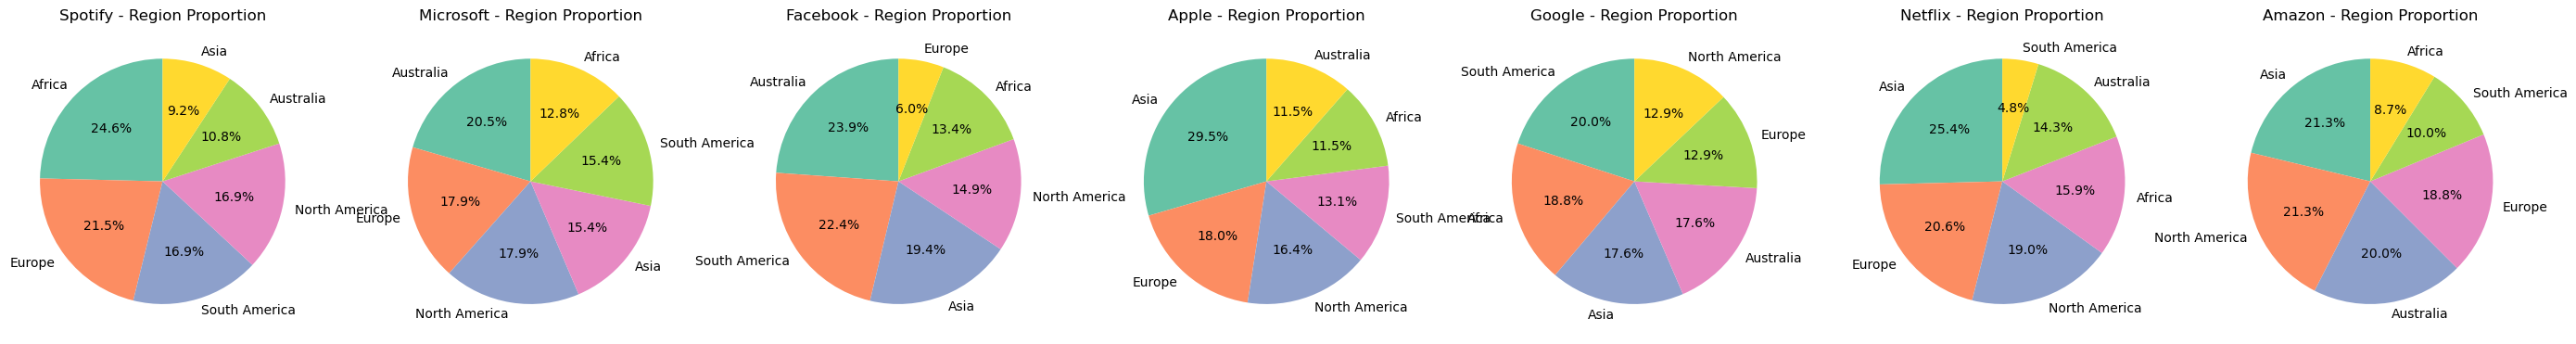

In [304]:
# Set color palette
sns.set_palette('Set2')

# Create a subplot for each account name
account_names = df['Account Name'].unique()
num_accounts = len(account_names)

fig, axes = plt.subplots(nrows=1, ncols=num_accounts, figsize=(5*num_accounts, 5))

# Iterate over each account name
for i, account in enumerate(account_names):
    # Filter data for the current account name
    account_data = df[df['Account Name'] == account]
    
    # Count the occurrences of each region
    counts = account_data['Region'].value_counts()
    
    # Plot pie chart
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette())
    axes[i].set_title(f'{account} - Region Proportion')

plt.show()

<Figure size 2000x700 with 0 Axes>

<AxesSubplot:xlabel='Region', ylabel='ARR'>

Text(0.5, 1.0, 'Account Name across various Region with ARR ')

Text(0.5, 0, 'Region')

Text(0, 0.5, 'ARR (Annual Recurring Revenue) in $')

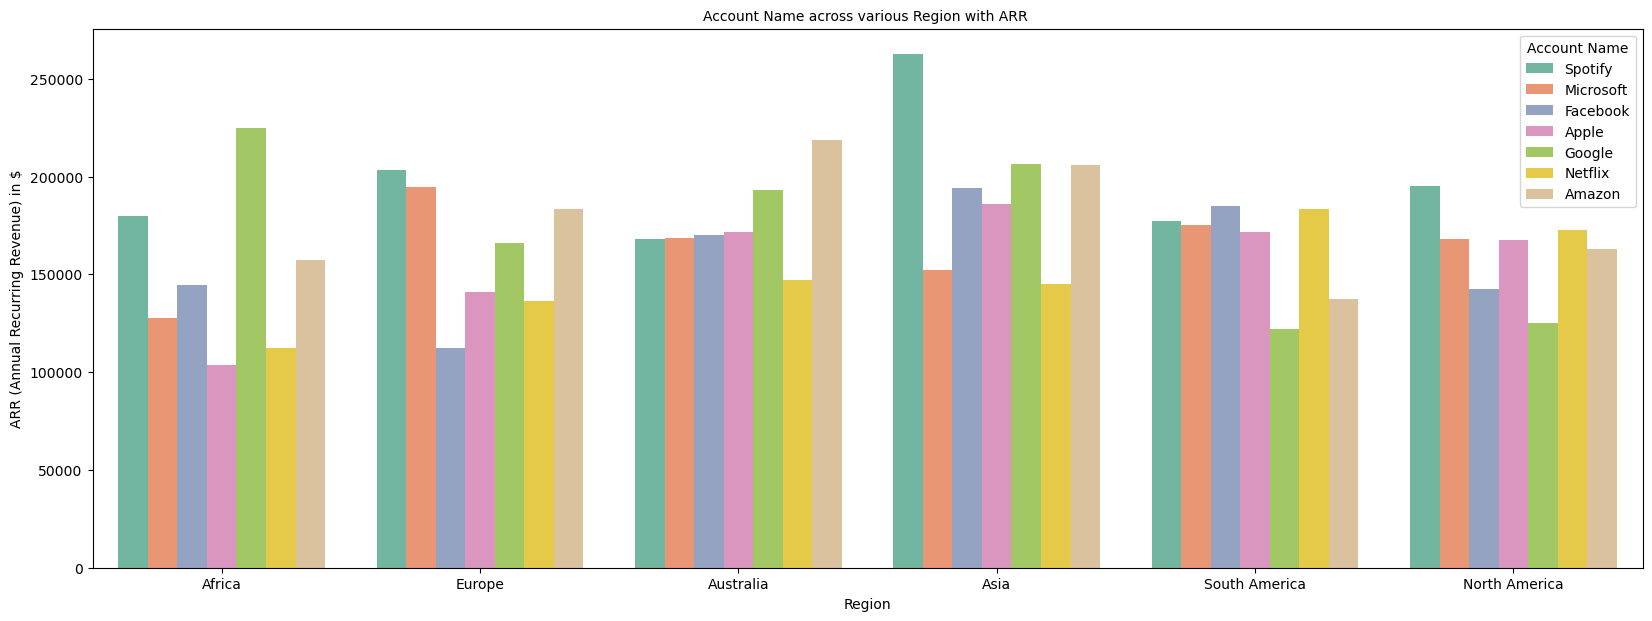

In [305]:
# Account Name for each Region with ARR
sns.set_palette('Set2')
plt.figure(figsize=(20, 7))
sns.barplot(x='Region', y='ARR', data=df, hue='Account Name', ci=None)
plt.title("Account Name across various Region with ARR ", fontsize=10)
plt.xlabel("Region")
plt.ylabel("ARR (Annual Recurring Revenue) in $")
plt.show()

<Figure size 2000x700 with 0 Axes>

<AxesSubplot:xlabel='Industry', ylabel='ARR'>

Text(0.5, 1.0, 'Account Name in various Industry with ARR ')

Text(0.5, 0, 'Industry')

Text(0, 0.5, 'ARR (Annual Recurring Revenue)')

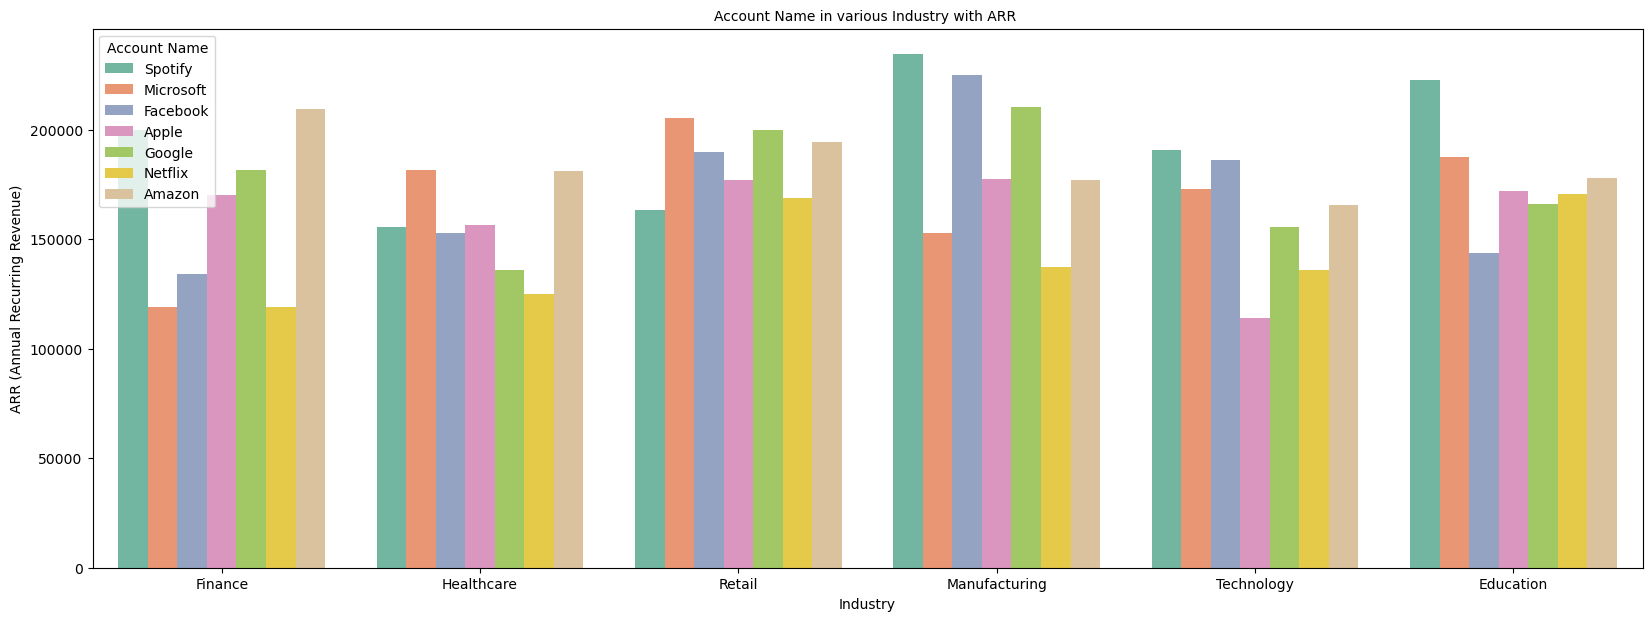

In [306]:
# Account Name for each Industry with ARR
sns.set_palette('Set2')
plt.figure(figsize=(20, 7))
sns.barplot(x='Industry', y='ARR', data=df, hue='Account Name', ci=None)
plt.title("Account Name in various Industry with ARR ", fontsize=10)
plt.xlabel("Industry")
plt.ylabel("ARR (Annual Recurring Revenue)")
plt.show()

<Figure size 2000x700 with 0 Axes>

<AxesSubplot:xlabel='Account Name', ylabel='ARR'>

Text(0.5, 1.0, 'Segmentation for each Account Name with ARR ')

Text(0.5, 0, 'Account Name')

Text(0, 0.5, 'ARR (Annual Recurring Revenue)')

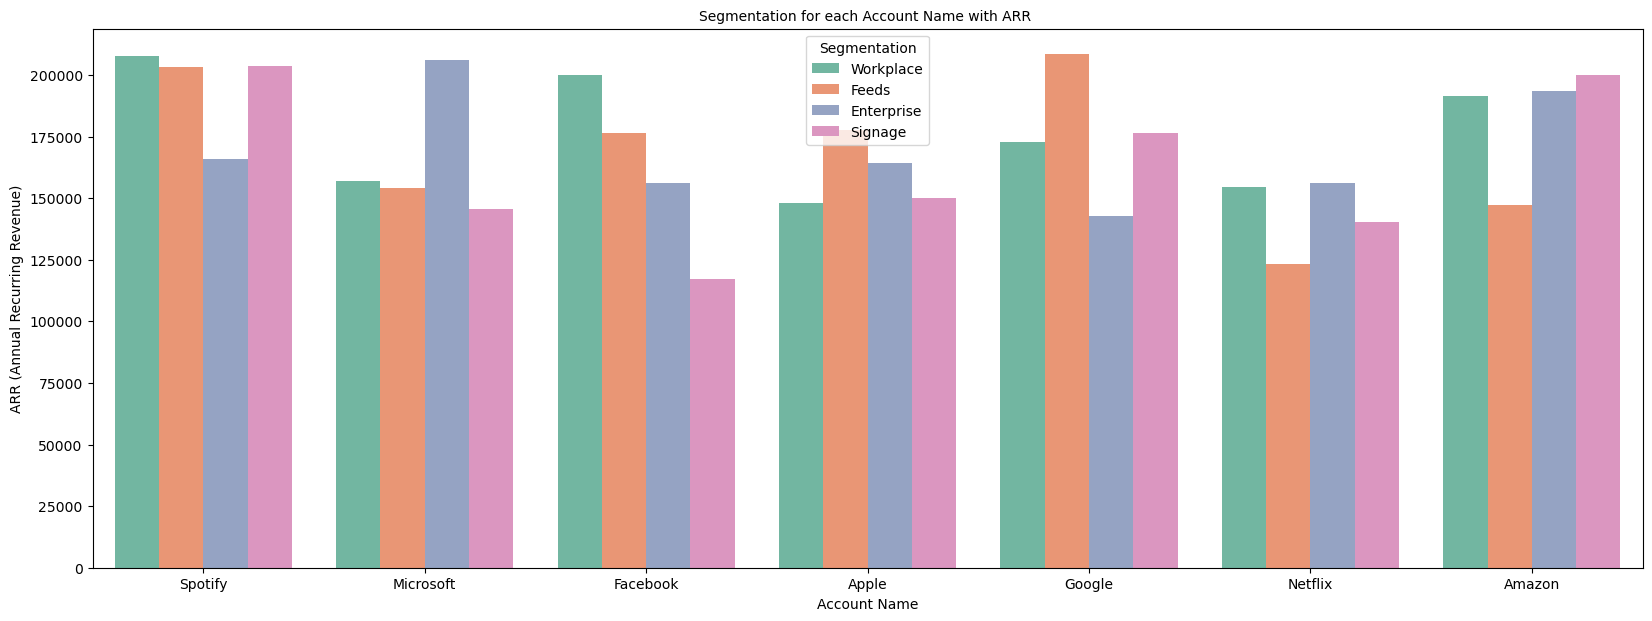

In [307]:
# Segmentation for each Account Name with ARR
sns.set_palette('Set2')
plt.figure(figsize=(20, 7))
sns.barplot(x='Account Name', y='ARR', data=df, hue='Segmentation', ci=None)
plt.title("Segmentation for each Account Name with ARR ", fontsize=10)
plt.xlabel("Account Name")
plt.ylabel("ARR (Annual Recurring Revenue)")
plt.show()

<Figure size 2000x700 with 0 Axes>

<AxesSubplot:xlabel='Account Name', ylabel='ARR'>

Text(0.5, 1.0, 'Employee band for each Account Name with ARR ')

Text(0.5, 0, 'Account Name')

Text(0, 0.5, 'ARR (Annual Recurring Revenue)')

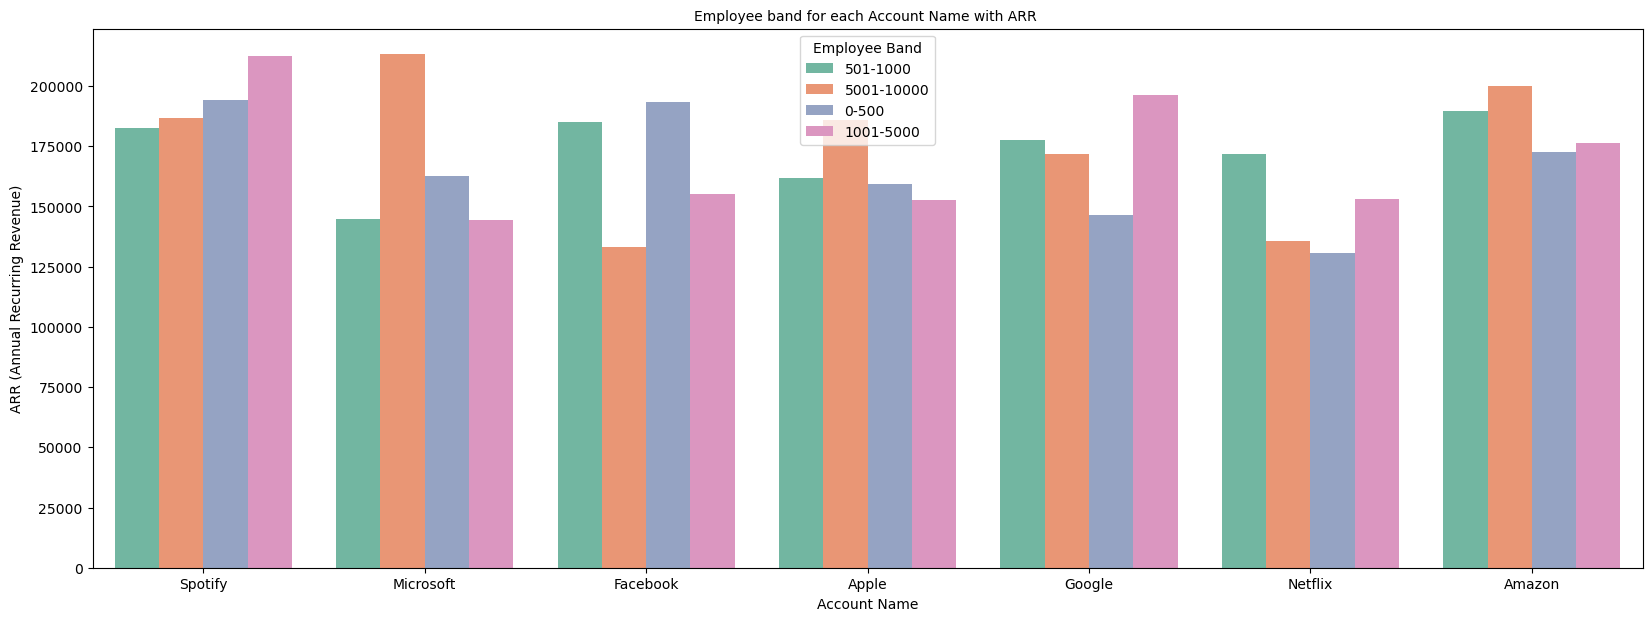

In [308]:
# Employee Band  for each Account Name with ARR
sns.set_palette('Set2')
plt.figure(figsize=(20, 7))
sns.barplot(x='Account Name', y='ARR', data=df, hue='Employee Band', ci=None)
plt.title("Employee band for each Account Name with ARR ", fontsize=10)
plt.xlabel("Account Name")
plt.ylabel("ARR (Annual Recurring Revenue)")
plt.show()

<Figure size 2000x700 with 0 Axes>

<AxesSubplot:xlabel='Account Name', ylabel='ARR'>

Text(0.5, 1.0, 'Product Usage Level for each Account Name with ARR ')

Text(0.5, 0, 'Account Name')

Text(0, 0.5, 'ARR (Annual Recurring Revenue)')

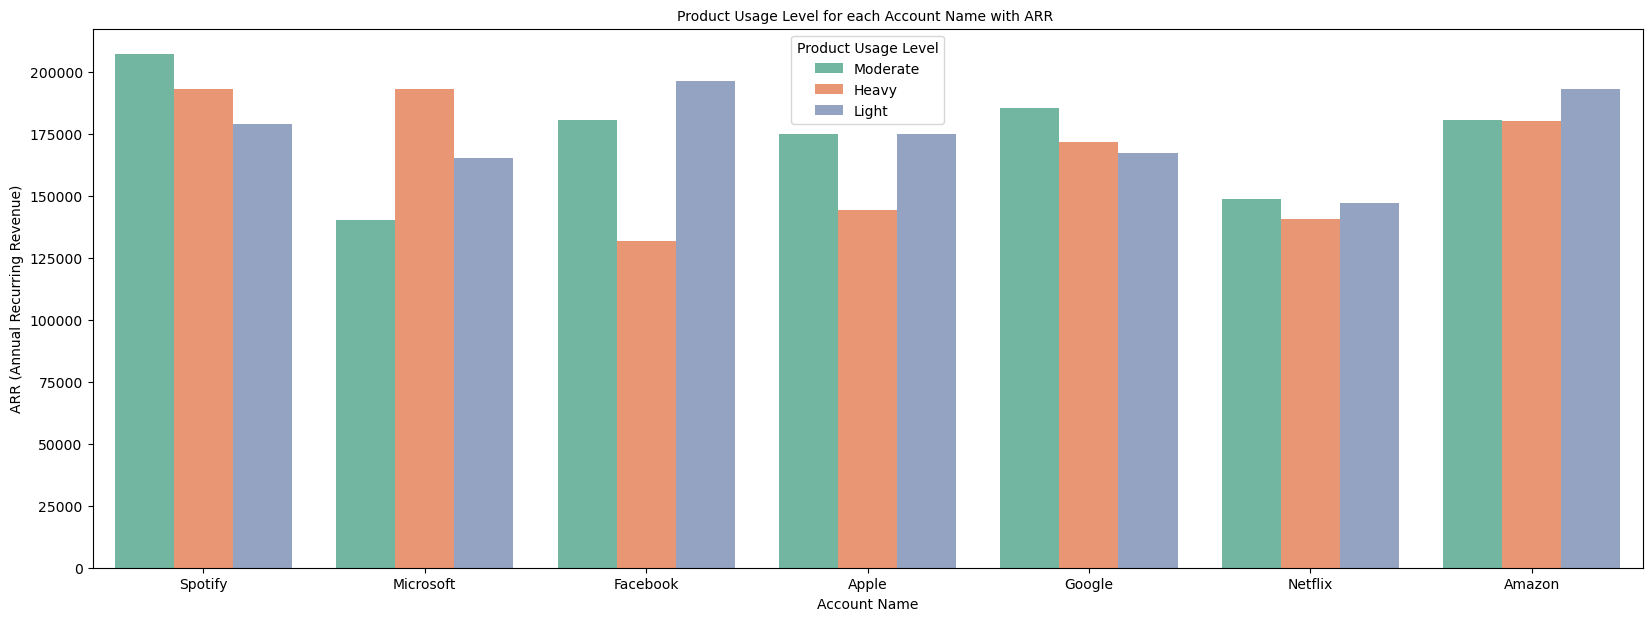

In [309]:
# Product Usage Level for each Account Name with ARR
sns.set_palette('Set2')
plt.figure(figsize=(20, 7))
sns.barplot(x='Account Name', y='ARR', data=df, hue='Product Usage Level', ci=None)
plt.title("Product Usage Level for each Account Name with ARR ", fontsize=10)
plt.xlabel("Account Name")
plt.ylabel("ARR (Annual Recurring Revenue)")
plt.show()

<Figure size 2000x600 with 0 Axes>

<AxesSubplot:xlabel='Region', ylabel='count'>

Text(0.5, 1.0, 'Regionwise Industry distribution')

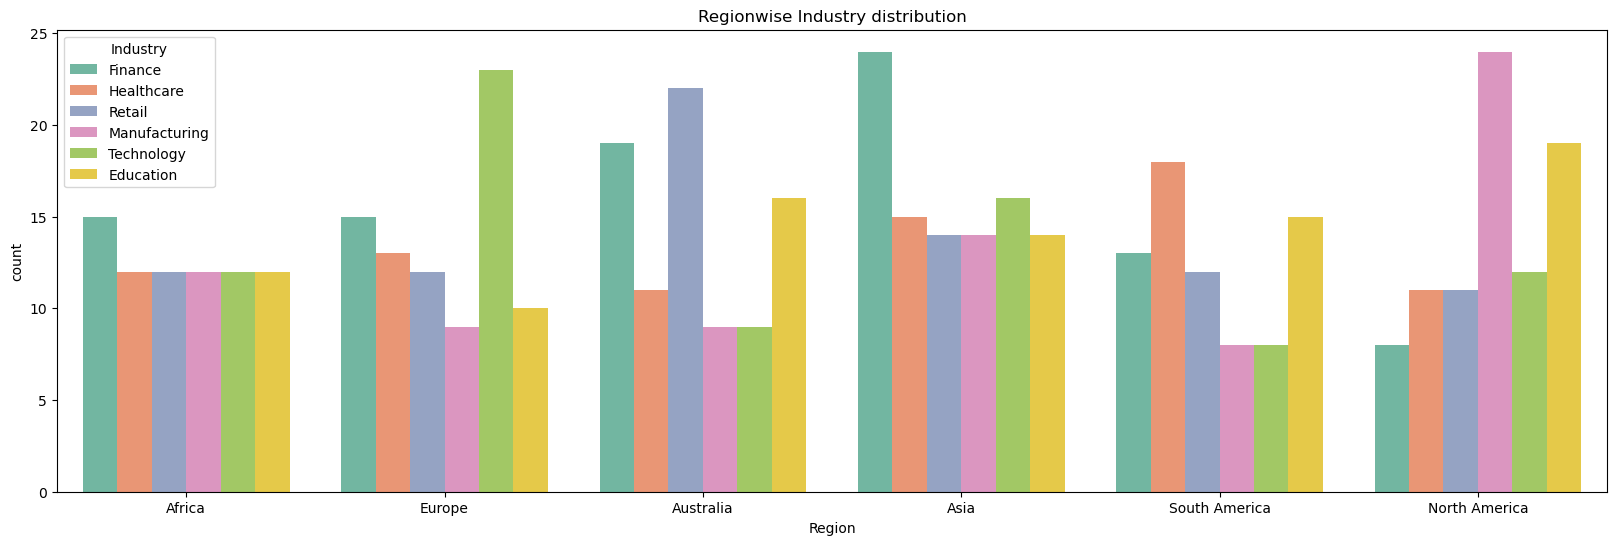

In [310]:
# Regionwise industry distribution
plt.figure(figsize=(20, 6))
sns.countplot(x='Region', hue='Industry', data=df)
plt.title('Regionwise Industry distribution')
plt.show()

<Figure size 2000x600 with 0 Axes>

<AxesSubplot:xlabel='Industry', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Segmentation within Industry')

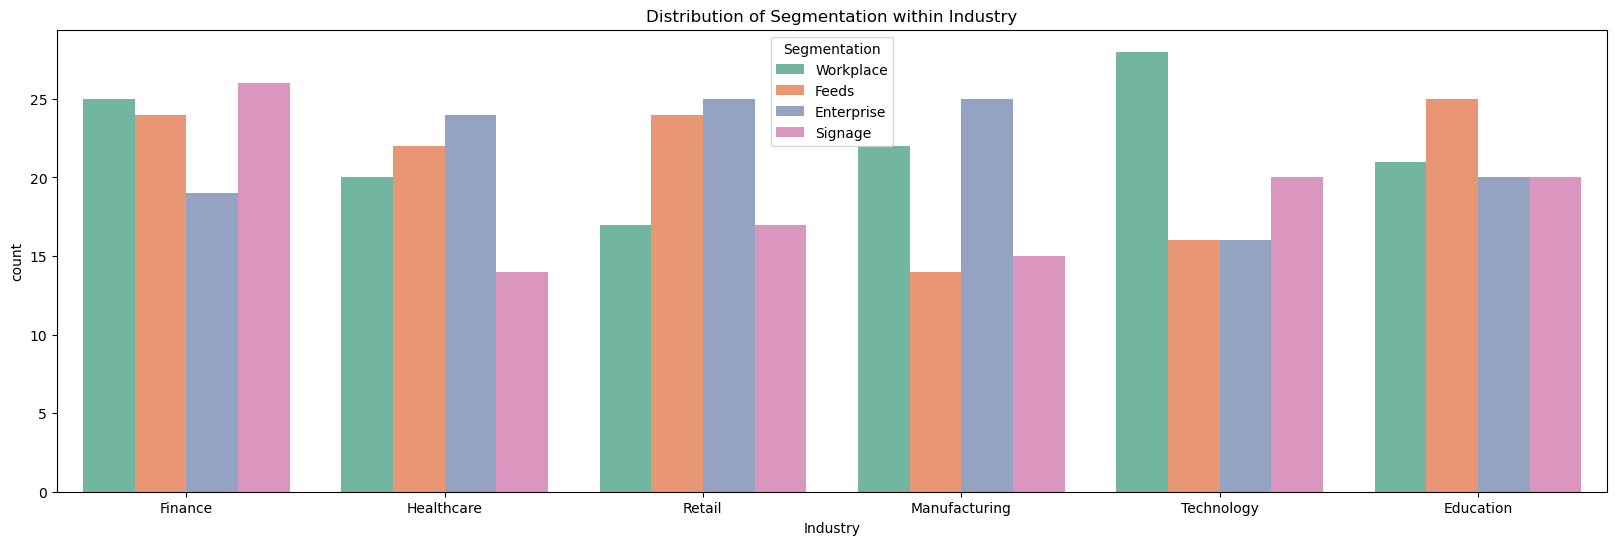

In [311]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Industry', hue='Segmentation', data=df)
plt.title('Distribution of Segmentation within Industry')
plt.show()

In [312]:
# Relationship between ARR and Industry
fig = px.box(df, x='Industry', y='ARR', title='Distribution of ARR across Industries')
fig.show()

In [313]:
# Bivariate Analysis:
#Relationship between ARR and Employee Band
fig = px.box(df, x='Employee Band', y='ARR', color_discrete_sequence=px.colors.qualitative.Set2, title='Distribution of ARR across Employee Band')
fig.show()

In [314]:
# ARR across Product Usage Level
fig = px.box(df, x='Product Usage Level', y='ARR', color_discrete_sequence=px.colors.qualitative.Set2, title='Distribution of ARR across Product Usage Level')
fig.show()

In [315]:
# ARR across Segmentation
fig = px.box(df, x='Segmentation', y='ARR', color_discrete_sequence=px.colors.qualitative.Set2, title='Distribution of ARR across Segmentation')
fig.show()

Customer Segmentation: